In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mesa import Agent, Model
from mesa.space import MultiGrid
from mesa.time import SimultaneousActivation
import random

# Agentes

In [2]:
class Item(Agent):
    def __init__(self, model, item_type, pontos):
        super().__init__(model)
        self.type = item_type
        self.pontos = pontos
        self.carregado_por = []

    def step(self):
        pass

In [6]:
class ReativoSimples(Agent):
    def __init__(self, model):
        super().__init__(model)
        self.has_item = False
        self.item = None
        self.contribuicao = 0
        self.nome = "AR"

    def pegar_item(self, item):
        if item.type == "Cristal Energético" or item.type == "Metal Raro":
            self.has_item = True
            self.item = item
            item.carregado_por = [self]

        elif item.type == "Estrutura Antiga" and len(item.carregado_por) < 2:
            item.carregado_por.append(self)
            if len(item.carregado_por) == 2:
                for agent in item.carregado_por:
                    agent.has_item = True
                    agent.item = item

    def entregar_item(self):
        if self.item:
            self.contribuicao += self.item.pontos
            #if self.item.type == "Cristal Energético" or self.item.type == "Metal Raro":
            
            self.has_item = False
            self.item.carregado_por = []
            self.model.remove_item(self.item)
            self.item = None

            #elif self.item.type == "Estrutura Antiga":
            #    if self in self.item.carregado:
            #      self.item.carregado.remove(self)
            #    if not self.item.carregado:
            #        self.item = None

    def verificar_item(self, possiveis_passos):
        tem = False
        passo_ = None
        item = None
        for passo in possiveis_passos:
            itens = [obj for obj in self.model.grid.get_cell_list_contents([passo]) if isinstance(obj, Item)]
            for possivel_item in itens:
                if possivel_item.type != "Estrutura Antiga" and len(possivel_item.carregado_por) == 0:
                    tem = True
                    item = possivel_item
                    break
            if tem:
                passo_ = passo
                break
        return item, passo_

    def step(self):
        #if self.has_item:
        #    self.move_towards(self.model.destination)
        #    if self.pos == self.model.destination:
        #        print(f"Agent {self.unique_id} delivered the item!")
        #        self.drop_item()
        #else:
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        #possible_steps = [pos for pos in possible_steps if not self.model.is_obstacle(pos)]
        if possible_steps:
            if not self.has_item:
                item, passo = self.verificar_item(possible_steps)
            else:
                passo = None
                item = None

            if passo is not None:
                new_position = passo
            elif self.has_item and self.model.base in possible_steps:
                new_position = self.model.base
            else:
                new_position = self.random.choice(possible_steps)

            self.model.grid.move_agent(self, new_position)

            if not self.has_item and item is not None:
                self.pegar_item(item)

        if self.pos == self.model.base:
            self.entregar_item()

    """
    def move_towards(self, target):
      x, y = self.pos
      tx, ty = target
      possible_steps = [(x + dx, y + dy) for dx in [-1, 0, 1] for dy in [-1, 0, 1] if (dx != 0 or dy != 0)]
      
      # Filter steps within grid boundaries before checking for obstacles
      possible_steps = [
          pos for pos in possible_steps 
          if 0 <= pos[0] < self.model.grid.width and 0 <= pos[1] < self.model.grid.height
      ]

      min_dist = min([abs(tx - px) + abs(ty - py) for px, py in possible_steps])
      closest_steps = [pos for pos in possible_steps if abs(tx - pos[0]) + abs(ty - pos[1]) == min_dist]
      new_position = self.random.choice(closest_steps)
      self.model.grid.move_agent(self, new_position)
    #"""


In [ ]:
#TODO verificar se esse agente esta de acordo com o que o professor pediu
class AgentEstados(Agent):
    def __init__(self, model):
        super().__init__(model)
        self.has_item = False
        self.item = None
        self.contribuicao = 0
        self.nome = "AE"
        self.memoria = np.full((model.grid.width, model.grid.height), "Desconhecido", dtype=object)

    def pegar_item(self, item):
        if item.type == "Cristal Energético" or item.type == "Metal Raro":
            self.has_item = True
            self.item = item
            item.carregado_por = [self]

        elif item.type == "Estrutura Antiga" and len(item.carregado_por) < 2:
            item.carregado_por.append(self)
            if len(item.carregado_por) == 2:
                for agent in item.carregado_por:
                    agent.has_item = True
                    agent.item = item

    def entregar_item(self):
        if self.item:
            self.contribuicao += self.item.pontos
            #if self.item.type == "Cristal Energético" or self.item.type == "Metal Raro":
            
            self.has_item = False
            self.item.carregado_por = []
            self.model.remove_item(self.item)
            self.item = None

            #elif self.item.type == "Estrutura Antiga":
            #    if self in self.item.carregado:
            #      self.item.carregado.remove(self)
            #    if not self.item.carregado:
            #        self.item = None

    def verificar_item(self, possiveis_passos):
        tem = False
        passo_ = None
        item = None
        for passo in possiveis_passos:
            itens = [obj for obj in self.model.grid.get_cell_list_contents([passo]) if isinstance(obj, Item)]
            for possivel_item in itens:
                if possivel_item.type != "Estrutura Antiga" and len(possivel_item.carregado_por) == 0:
                    tem = True
                    item = possivel_item
                    break
            if tem:
                passo_ = passo
                break
        return item, passo_

    def step(self):
        #if self.has_item:
        #    self.move_towards(self.model.destination)
        #    if self.pos == self.model.destination:
        #        print(f"Agent {self.unique_id} delivered the item!")
        #        self.drop_item()
        #else:
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        #possible_steps = [pos for pos in possible_steps if not self.model.is_obstacle(pos)]
        posicao_antiga = self.pos
        if possible_steps:
            if not self.has_item:
                item, passo = self.verificar_item(possible_steps)
            else:
                passo = None
                item = None

            if passo is not None:
                new_position = passo

            elif self.has_item and self.model.base in possible_steps:
                new_position = self.model.base

            else:
                possible_steps_copy = []
                for pos in possible_steps:
                    possible_steps_copy.append(pos)
                #possible_steps
                i = 0
                new_position = None
                while(i <= 10 and not possible_steps_copy == [] and new_position == None):
                    new_position = self.random.choice(possible_steps_copy)
                    espaco = self.memoria[new_position[0]][new_position[1]]
                    if espaco == "Visitado":
                        possible_steps_copy.remove(new_position)
                        new_position = None
                    i += 1

                if possible_steps_copy == [] or i > 10:
                    print(possible_steps)
                    new_position= self.random.choice(possible_steps)
 

            self.model.grid.move_agent(self, new_position)
            self.memoria[posicao_antiga[0]][posicao_antiga[1]] = "Visitado"

            if not self.has_item and item is not None:
                self.pegar_item(item)

        if self.pos == self.model.base:
            self.entregar_item()

    """
    def move_towards(self, target):
      x, y = self.pos
      tx, ty = target
      possible_steps = [(x + dx, y + dy) for dx in [-1, 0, 1] for dy in [-1, 0, 1] if (dx != 0 or dy != 0)]
      
      # Filter steps within grid boundaries before checking for obstacles
      possible_steps = [
          pos for pos in possible_steps 
          if 0 <= pos[0] < self.model.grid.width and 0 <= pos[1] < self.model.grid.height
      ]

      min_dist = min([abs(tx - px) + abs(ty - py) for px, py in possible_steps])
      closest_steps = [pos for pos in possible_steps if abs(tx - pos[0]) + abs(ty - pos[1]) == min_dist]
      new_position = self.random.choice(closest_steps)
      self.model.grid.move_agent(self, new_position)
    #"""


# Modelo

In [10]:
class RandomWalkModel(Model):
    def __init__(self, N, width, height,num_cristais, num_metais, num_estrutura_old, base, seed=None):
        self.num_reativosSimples = N
        self.num_agentsEstados = N
        self.grid = MultiGrid(width, height, False)
        self.random = random.Random(seed)
        self.schedule = SimultaneousActivation(self)
        self.num_metais = num_metais
        self.num_cristais = num_cristais
        self.num_estrutura_old = num_estrutura_old
        self.base = base
        self.items_metal = []
        self.items_cristal = []
        self.items_estrutura = []
        self.contribuicao_total = 0

        # Criando os agentes Reativos simples
        for i in range(self.num_reativosSimples):
            a = ReativoSimples(self)
            self.schedule.add(a)
            self.grid.place_agent(a, base)
            print(a.pos)

        for i in range(self.num_agentsEstados):
            a = AgentEstados(self)
            self.schedule.add(a)
            self.grid.place_agent(a, base)
            print(a.pos)

        # Criando os metais raros
        for i in range(self.num_metais):
            s = Item(self, "Metais Raros", 20)
            self.items_metal.append(s)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(s, (x, y))

        # criando os cristais
        for i in range(self.num_cristais):
            s = Item(self, "Cristal Energético", 10)
            self.items_cristal.append(s)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(s, (x, y))

        # Criando as estruturas
        for i in range(self.num_estrutura_old):
            d = Item(self, "Esturtura Antiga", 50)
            self.items_estrutura.append(d)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(d, (x, y))

    def step(self):
        self.schedule.step()

    def remove_item(self, item):
        if item is not None:
            self.contribuicao_total += item.pontos
            if item.type == "Cristal Energético":
                self.items_cristal.remove(item)
            elif item.type == "Metal Raro":
                self.items_metal.remove(item)
            elif item.type == "Estrutura Antiga":
                self.items_estrutura.remove(item)
            self.grid.remove_agent(item)

# Funções auxiliares

In [20]:
def visualize_model(model, step_number, fig_width=10, fig_height=10):
    grid = np.full((model.grid.width, model.grid.height), "", dtype=object)

    # Mark destination
    dx, dy = model.base
    grid[dx, dy] = "B "

    # Add all agents to the grid
    for agent in model.schedule.agents:
        x, y = agent.pos
        agent_class = type(agent).__name__
        print(f"Agent {agent.unique_id} at position ({x}, {y}) is of class {agent_class}")
        # Agente Reativo Simples = AR
        # Agente baseado em EStados = AE
        # Agente baseado em Objetivos = AO
        # Agente Cooperativo = AC
        # Agente BDI = AB

        if isinstance(agent, ReativoSimples) or isinstance(agent, AgentEstados):
            nome = agent.nome

            if agent.has_item:
                item_carregado = agent.item
                if item_carregado.type == "Cristal Energético":
                    grid[x, y] += f"{nome}{agent.unique_id}(CE)"
                elif item_carregado.type == "Metal Raro":
                    grid[x, y] += f"{nome}{agent.unique_id}(MR)"
                elif item_carregado.type == "Estrutura Antiga":
                    grid[x, y] += f"{nome}{agent.unique_id}(EA)"
                else:
                    grid[x, y] += f"{nome}{agent.unique_id}(I)"
            else:
                grid[x, y] += f"{nome}{agent.unique_id} "

    # Add single items to the grid
    for item in model.items_cristal:
        if not item.carregado_por:
            x, y = item.pos
            grid[x, y] += f"CE{item.unique_id} "

    for item in model.items_metal:
        if not item.carregado_por:
            x, y = item.pos
            grid[x, y] += f"MR{item.unique_id}"
    # Add double items to the grid
    for item in model.items_estrutura:
        if not item.carregado_por:
            x, y = item.pos
            grid[x, y] += f"EA{item.unique_id} "

    plt.figure(figsize=(fig_width, fig_height))
    for x in range(model.grid.width):
        for y in range(model.grid.height):
            plt.text(y, x, grid[x, y], ha='center', va='center', color='black', fontsize=12,
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    plt.xlim(-0.5, model.grid.width - 0.5)
    plt.ylim(-0.5, model.grid.height - 0.5)
    plt.xticks(range(model.grid.width))
    plt.yticks(range(model.grid.height))
    plt.grid()
    plt.title(f'Step {step_number}')
    plt.show()

# Execução do modelo

C:\Users\G-Fire\AppData\Local\Temp\ipykernel_584\1334113429.py:7: DeprecationWarning: The time module and all its Schedulers are deprecated and will be removed in Mesa 3.1. They can be replaced with AgentSet functionality. See the migration guide for details. https://mesa.readthedocs.io/latest/migration_guide.html#time-and-schedulers
  self.schedule = SimultaneousActivation(self)


(0, 0)
(0, 0)
(0, 0)
(0, 0)
Agent 1 at position (0, 0) is of class ReativoSimples
Agent 2 at position (0, 0) is of class ReativoSimples
Agent 3 at position (0, 0) is of class AgentEstados
Agent 4 at position (0, 0) is of class AgentEstados


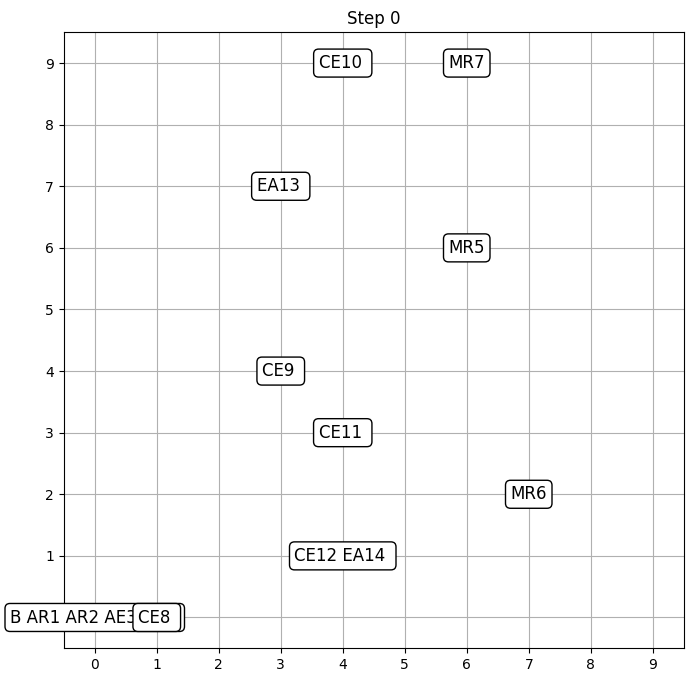

Agent 1 at position (0, 1) is of class ReativoSimples
Agent 2 at position (1, 1) is of class ReativoSimples
Agent 3 at position (1, 1) is of class AgentEstados
Agent 4 at position (0, 1) is of class AgentEstados


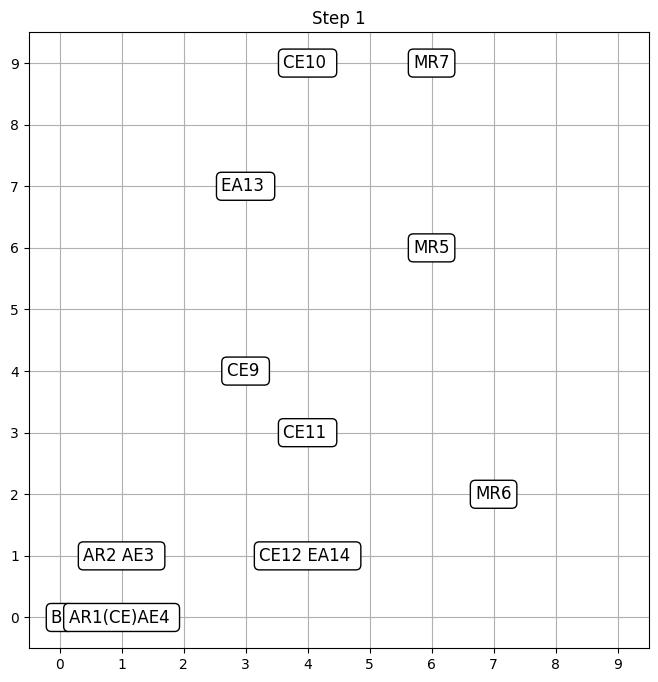

Agent 1 at position (0, 0) is of class ReativoSimples
Agent 2 at position (1, 2) is of class ReativoSimples
Agent 3 at position (0, 1) is of class AgentEstados
Agent 4 at position (1, 1) is of class AgentEstados


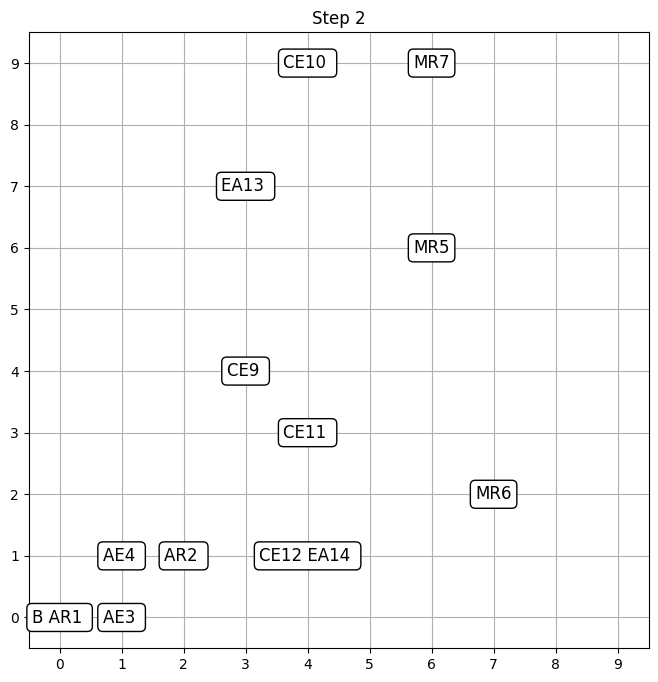

Agent 1 at position (1, 1) is of class ReativoSimples
Agent 2 at position (2, 3) is of class ReativoSimples
Agent 3 at position (0, 2) is of class AgentEstados
Agent 4 at position (2, 2) is of class AgentEstados


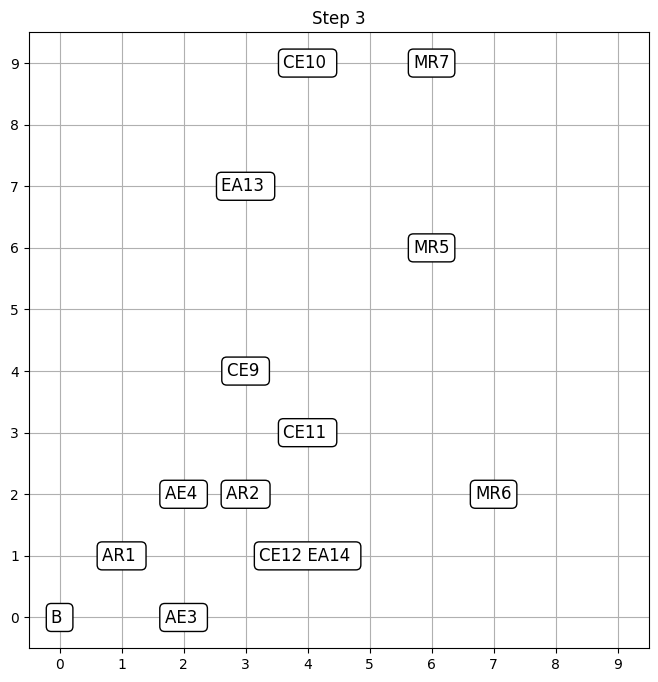

Agent 1 at position (2, 0) is of class ReativoSimples
Agent 2 at position (1, 4) is of class ReativoSimples
Agent 3 at position (0, 3) is of class AgentEstados
Agent 4 at position (2, 3) is of class AgentEstados


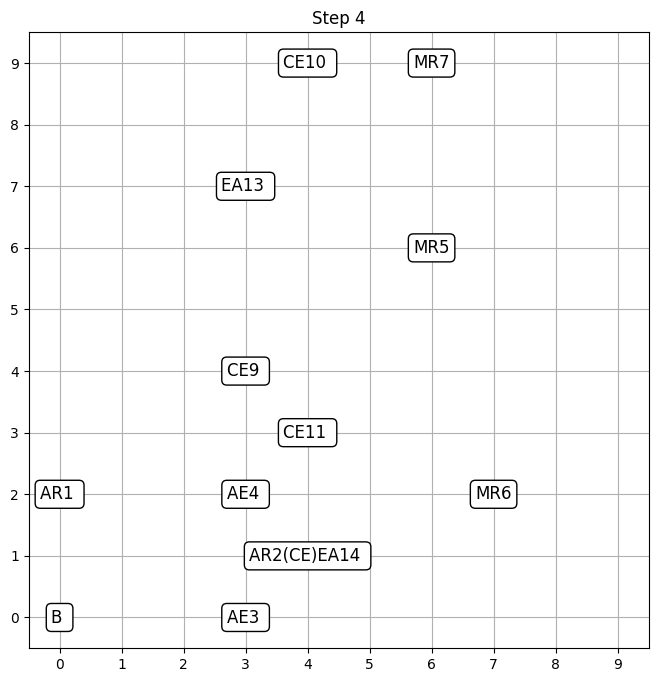

Agent 1 at position (3, 0) is of class ReativoSimples
Agent 2 at position (0, 3) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


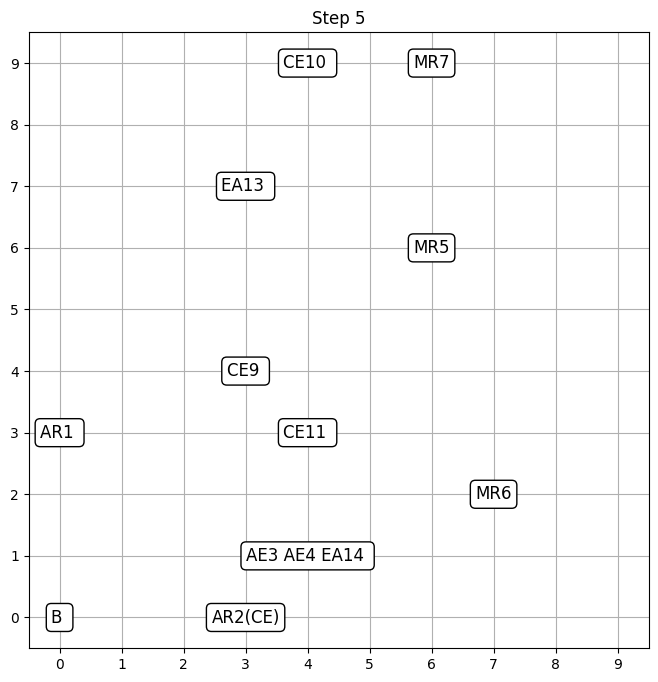

Agent 1 at position (4, 0) is of class ReativoSimples
Agent 2 at position (1, 3) is of class ReativoSimples
Agent 3 at position (2, 5) is of class AgentEstados
Agent 4 at position (1, 3) is of class AgentEstados


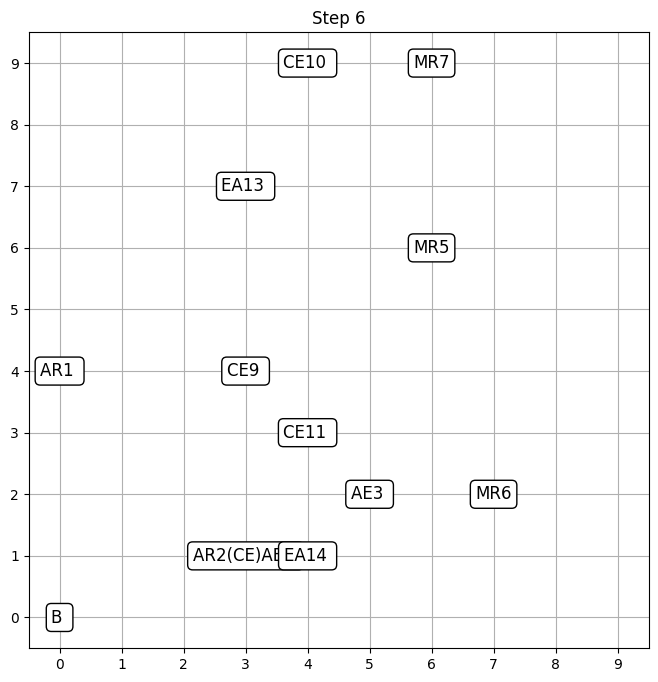

Agent 1 at position (5, 1) is of class ReativoSimples
Agent 2 at position (1, 4) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


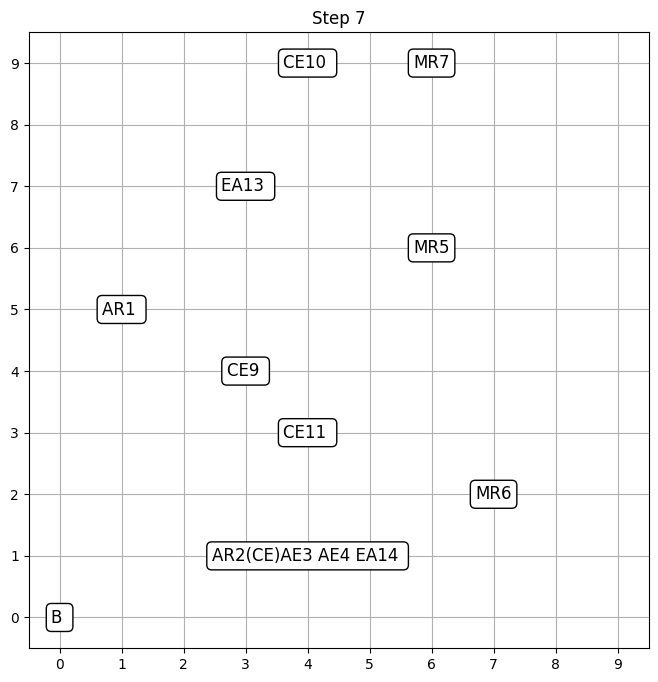

Agent 1 at position (4, 1) is of class ReativoSimples
Agent 2 at position (2, 4) is of class ReativoSimples
Agent 3 at position (0, 5) is of class AgentEstados
Agent 4 at position (0, 4) is of class AgentEstados


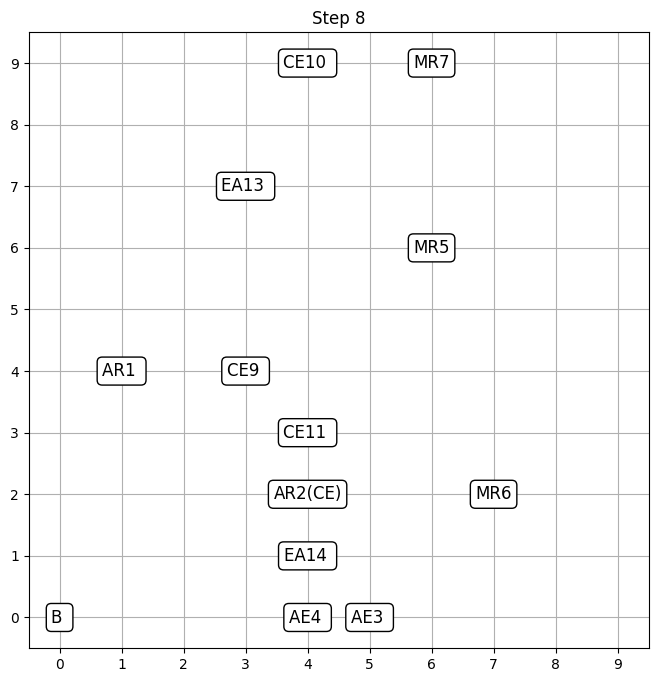

Agent 1 at position (3, 0) is of class ReativoSimples
Agent 2 at position (3, 5) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


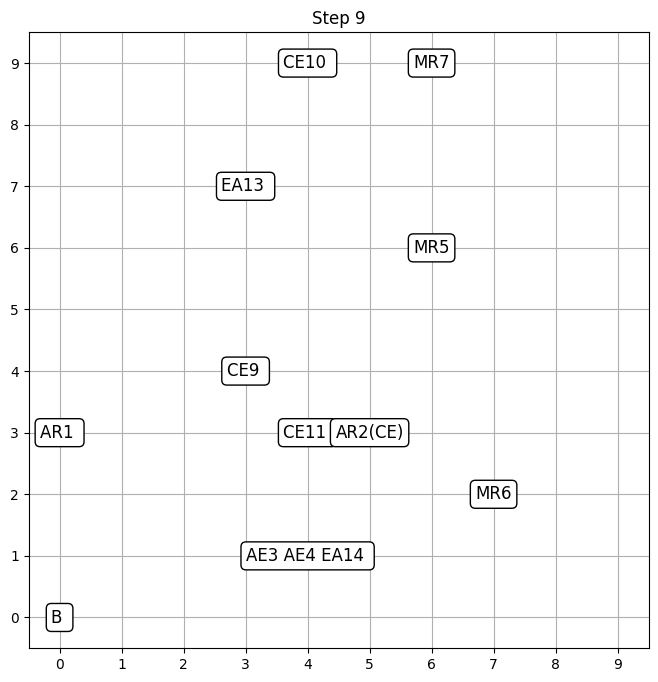

Agent 1 at position (4, 1) is of class ReativoSimples
Agent 2 at position (3, 4) is of class ReativoSimples
Agent 3 at position (2, 4) is of class AgentEstados
Agent 4 at position (1, 5) is of class AgentEstados


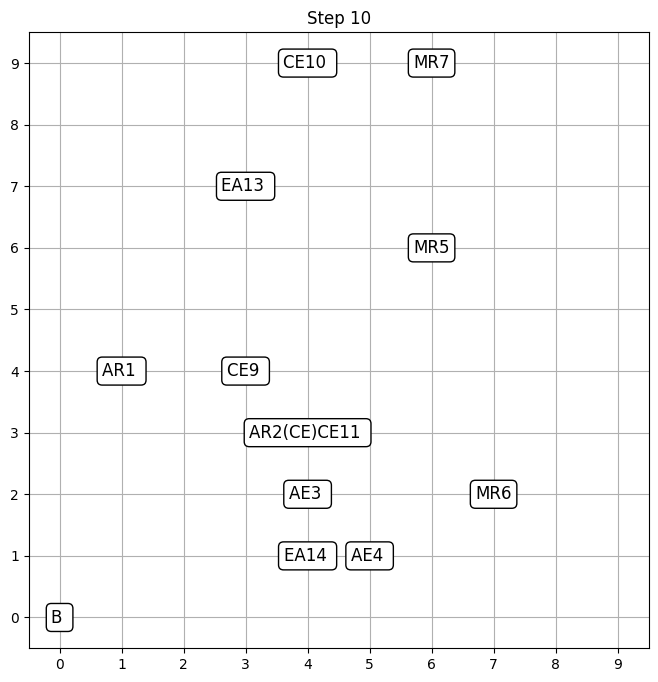

Agent 1 at position (5, 0) is of class ReativoSimples
Agent 2 at position (4, 5) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


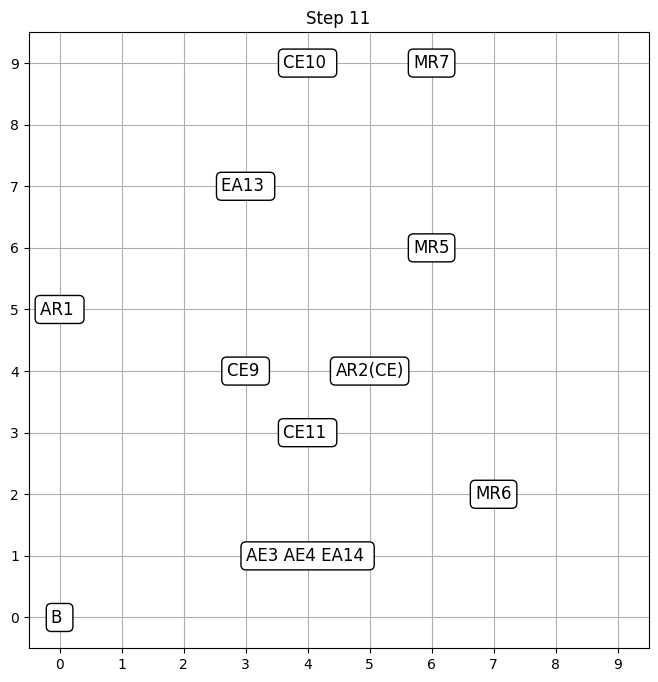

Agent 1 at position (4, 1) is of class ReativoSimples
Agent 2 at position (5, 5) is of class ReativoSimples
Agent 3 at position (2, 3) is of class AgentEstados
Agent 4 at position (2, 5) is of class AgentEstados


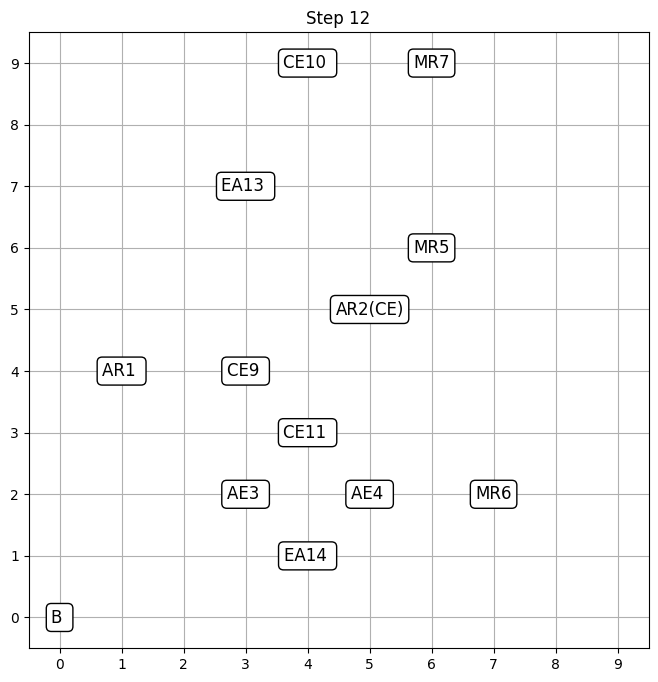

Agent 1 at position (5, 2) is of class ReativoSimples
Agent 2 at position (6, 4) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


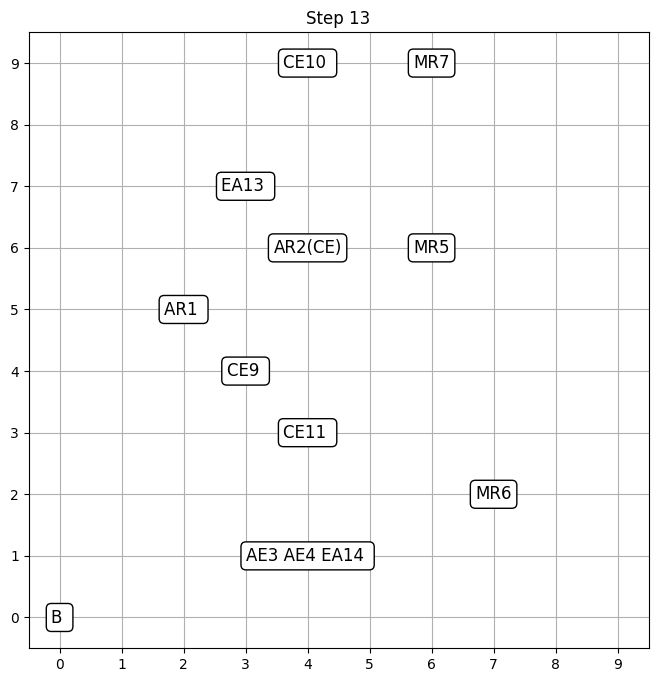

Agent 1 at position (4, 3) is of class ReativoSimples
Agent 2 at position (5, 5) is of class ReativoSimples
Agent 3 at position (0, 4) is of class AgentEstados
Agent 4 at position (2, 4) is of class AgentEstados


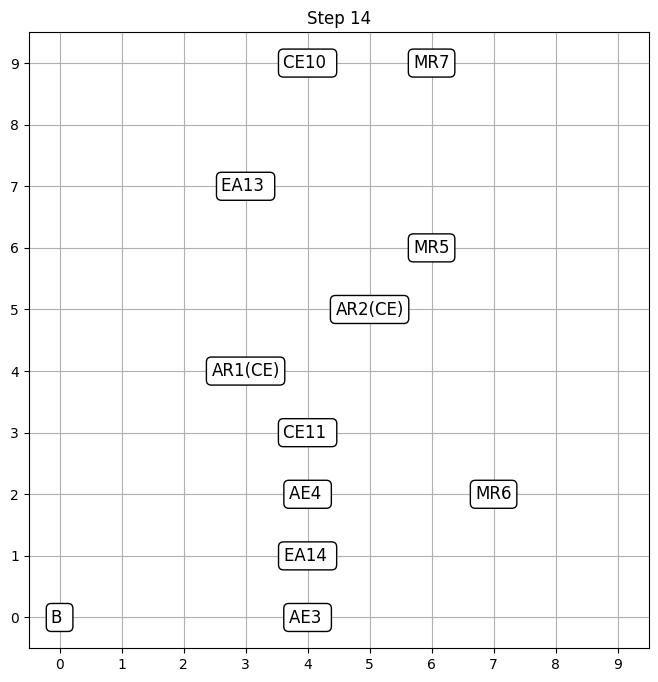

Agent 1 at position (3, 4) is of class ReativoSimples
Agent 2 at position (4, 4) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


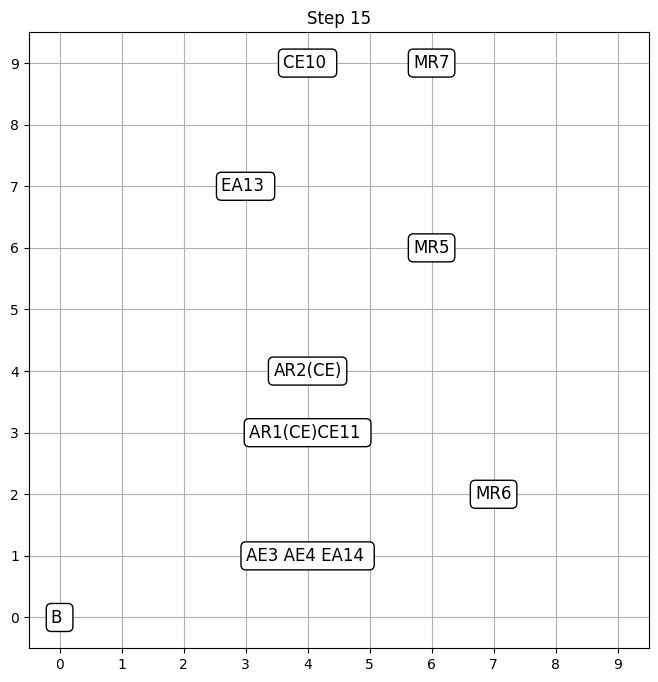

Agent 1 at position (4, 3) is of class ReativoSimples
Agent 2 at position (4, 3) is of class ReativoSimples
Agent 3 at position (1, 3) is of class AgentEstados
Agent 4 at position (0, 5) is of class AgentEstados


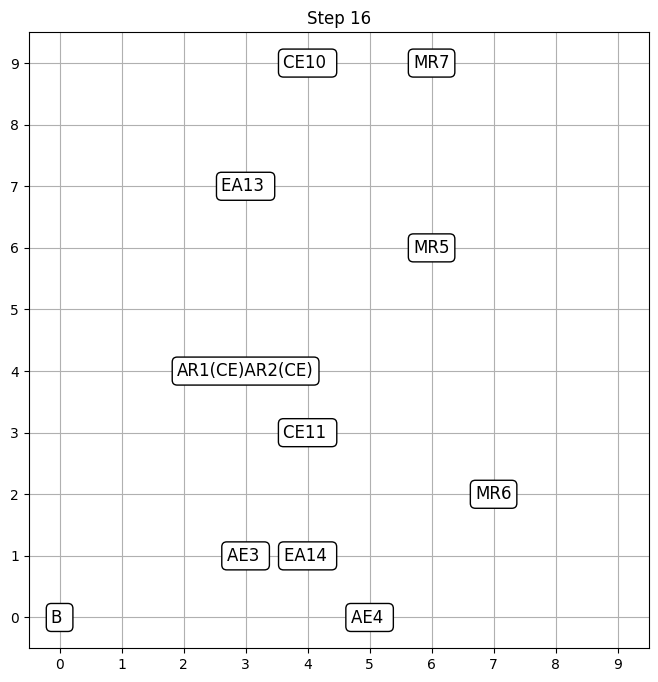

Agent 1 at position (5, 4) is of class ReativoSimples
Agent 2 at position (3, 3) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


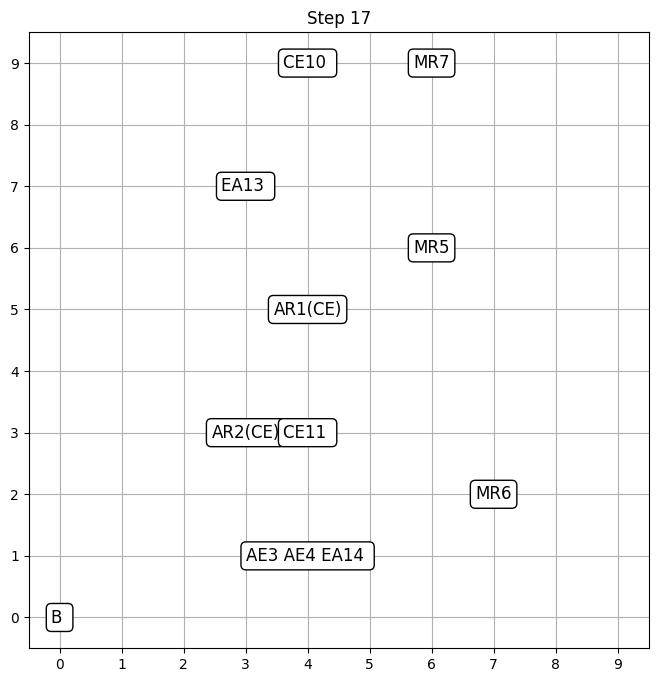

Agent 1 at position (6, 3) is of class ReativoSimples
Agent 2 at position (2, 2) is of class ReativoSimples
Agent 3 at position (1, 5) is of class AgentEstados
Agent 4 at position (0, 3) is of class AgentEstados


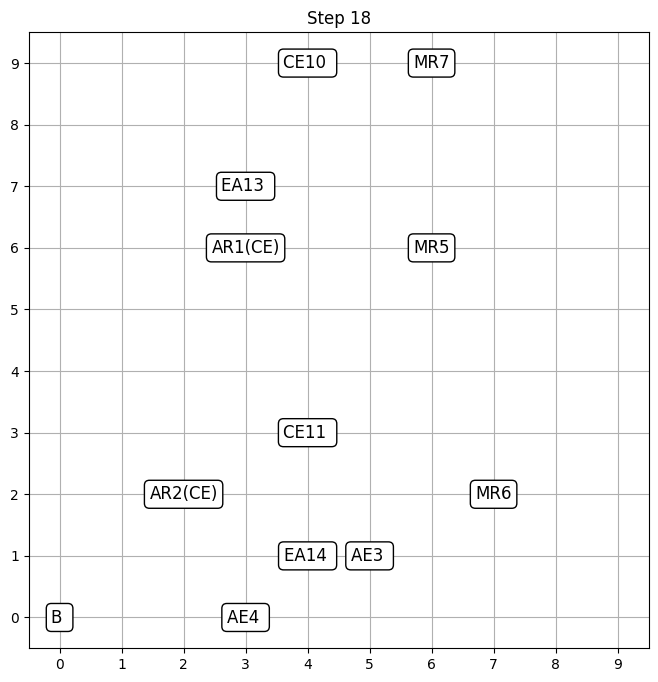

Agent 1 at position (7, 2) is of class ReativoSimples
Agent 2 at position (2, 1) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


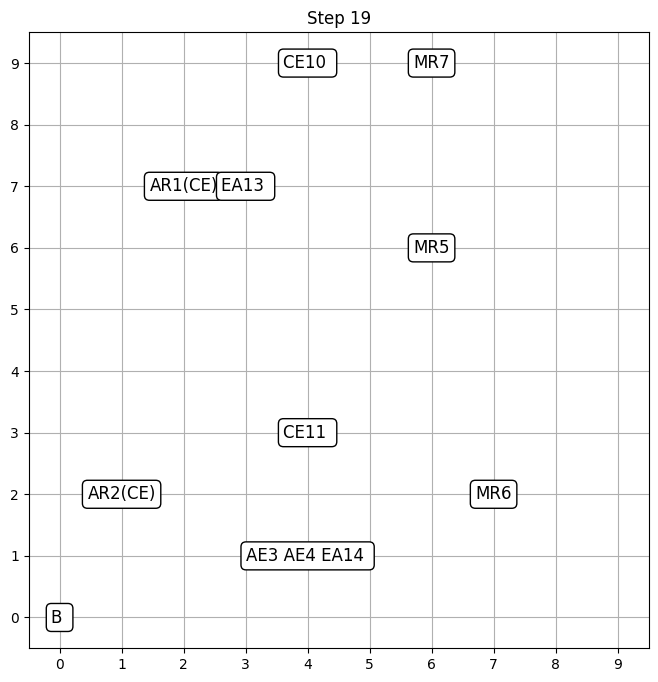

((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))
((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))
Agent 1 at position (7, 3) is of class ReativoSimples
Agent 2 at position (1, 1) is of class ReativoSimples
Agent 3 at position (1, 5) is of class AgentEstados
Agent 4 at position (2, 5) is of class AgentEstados


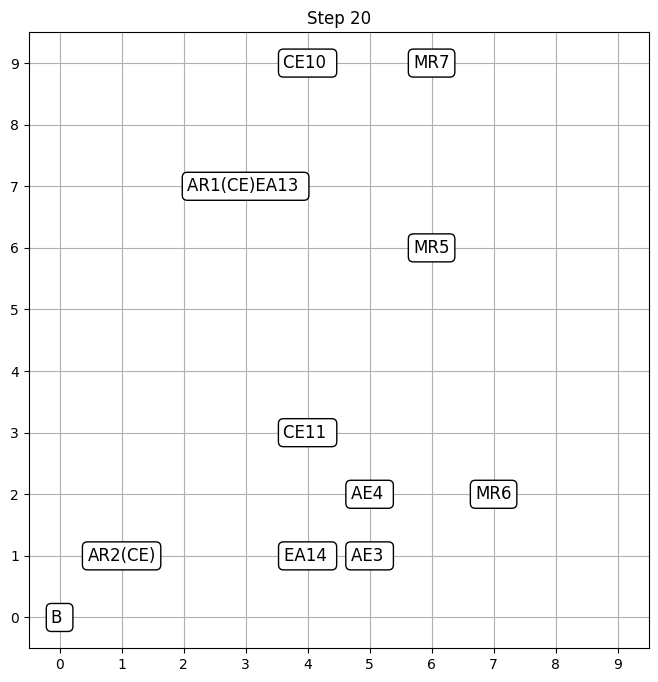

Agent 1 at position (8, 2) is of class ReativoSimples
Agent 2 at position (0, 0) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


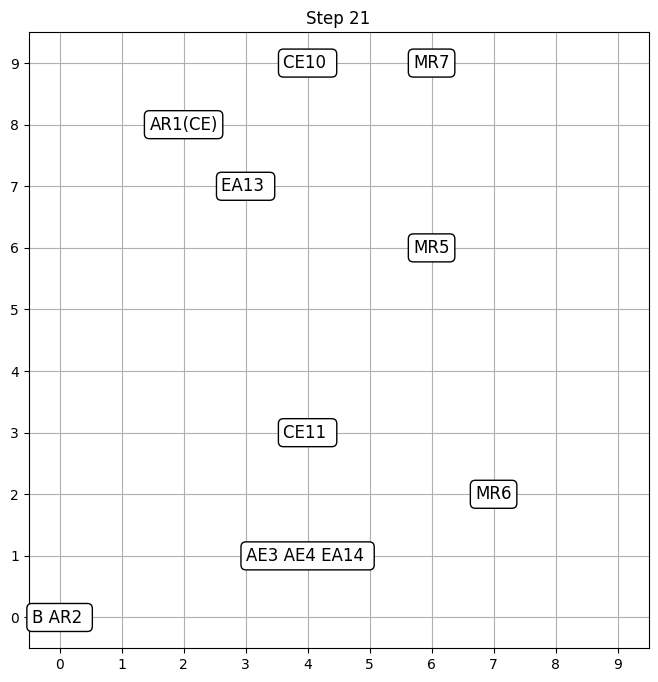

((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))
((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))
Agent 1 at position (7, 3) is of class ReativoSimples
Agent 2 at position (1, 0) is of class ReativoSimples
Agent 3 at position (0, 3) is of class AgentEstados
Agent 4 at position (2, 4) is of class AgentEstados


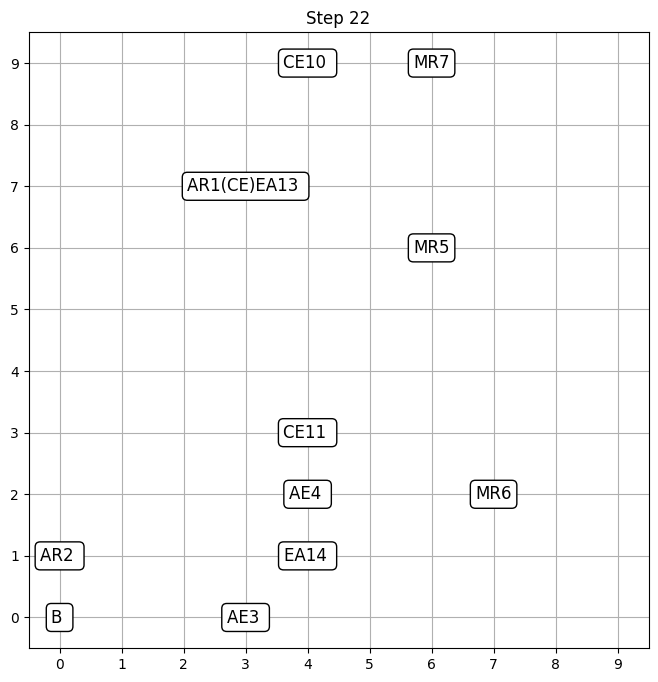

Agent 1 at position (8, 3) is of class ReativoSimples
Agent 2 at position (0, 0) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


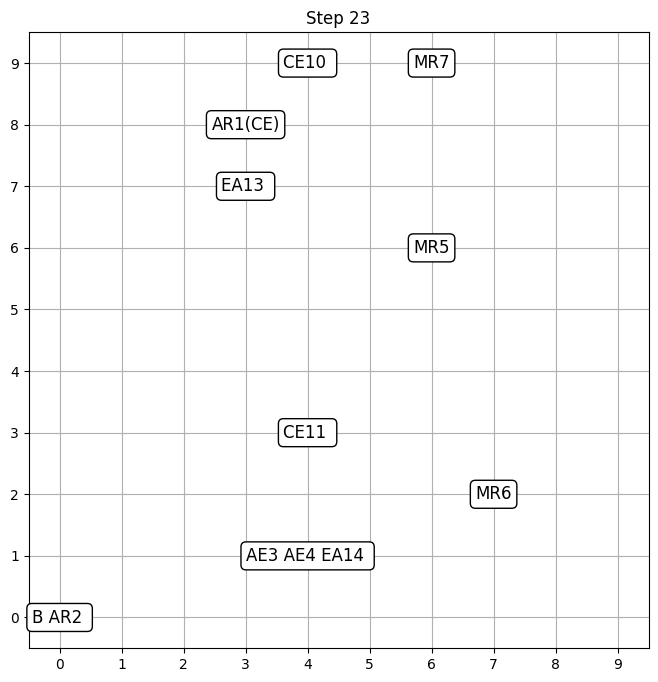

((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))
((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))
Agent 1 at position (7, 4) is of class ReativoSimples
Agent 2 at position (0, 1) is of class ReativoSimples
Agent 3 at position (2, 5) is of class AgentEstados
Agent 4 at position (2, 5) is of class AgentEstados


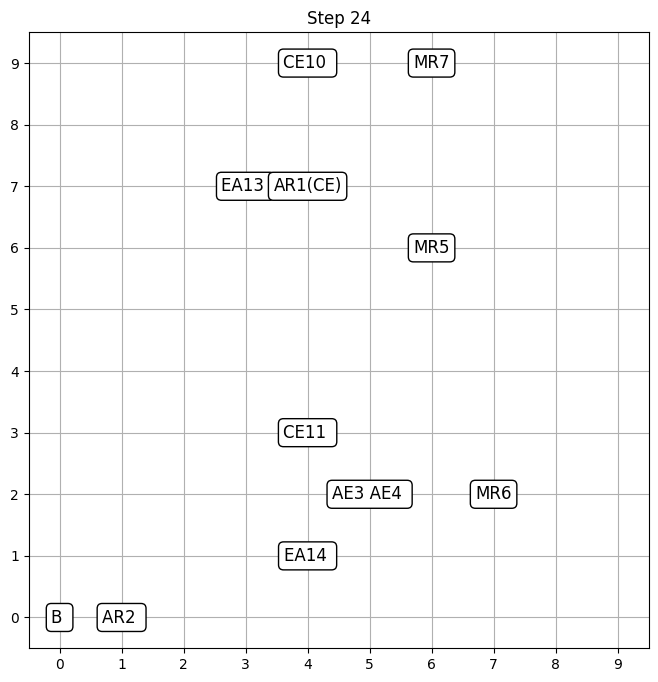

Agent 1 at position (8, 4) is of class ReativoSimples
Agent 2 at position (1, 1) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


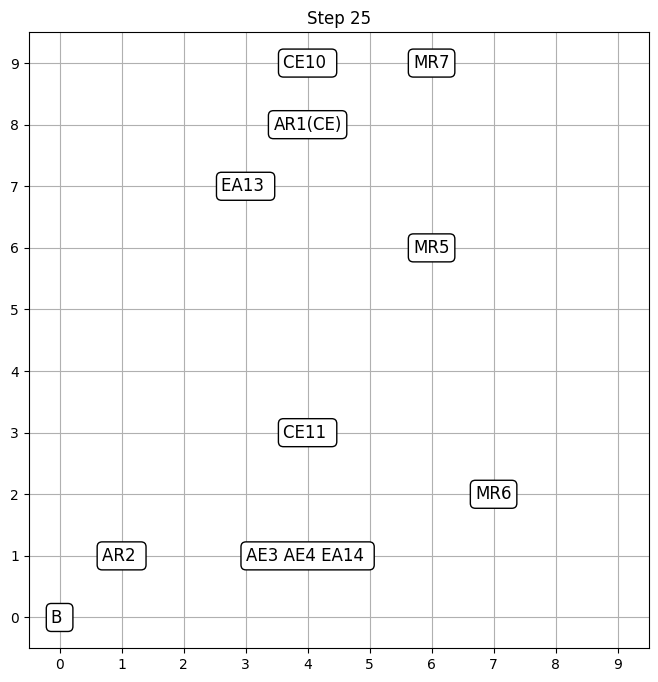

((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))
((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))
Agent 1 at position (7, 5) is of class ReativoSimples
Agent 2 at position (1, 0) is of class ReativoSimples
Agent 3 at position (0, 4) is of class AgentEstados
Agent 4 at position (1, 3) is of class AgentEstados


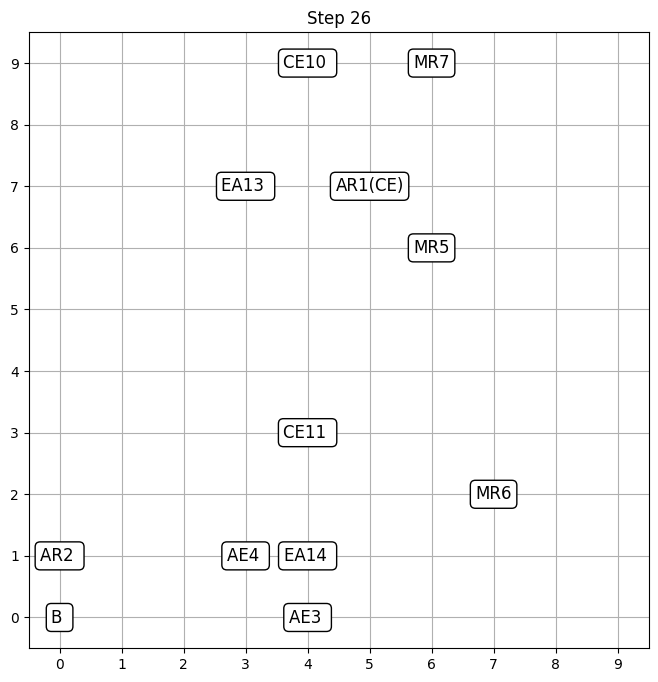

Agent 1 at position (7, 6) is of class ReativoSimples
Agent 2 at position (0, 0) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


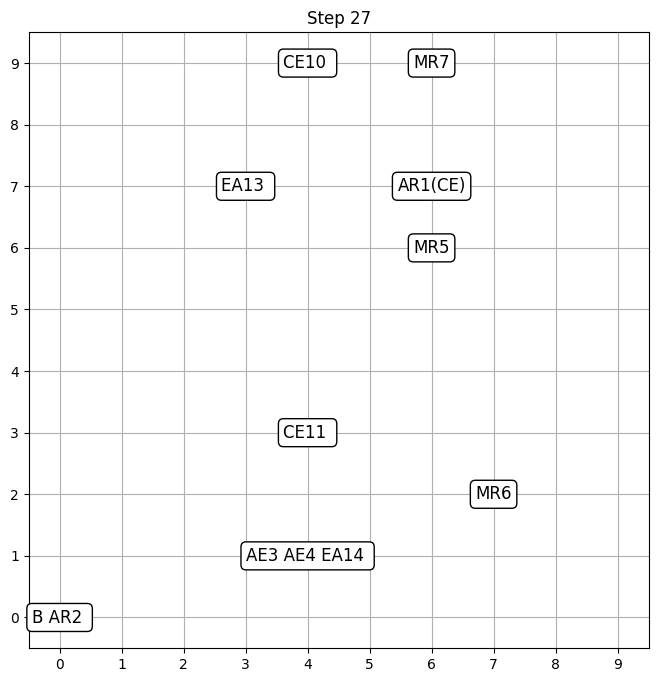

((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))
((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))
Agent 1 at position (8, 7) is of class ReativoSimples
Agent 2 at position (1, 0) is of class ReativoSimples
Agent 3 at position (1, 3) is of class AgentEstados
Agent 4 at position (0, 5) is of class AgentEstados


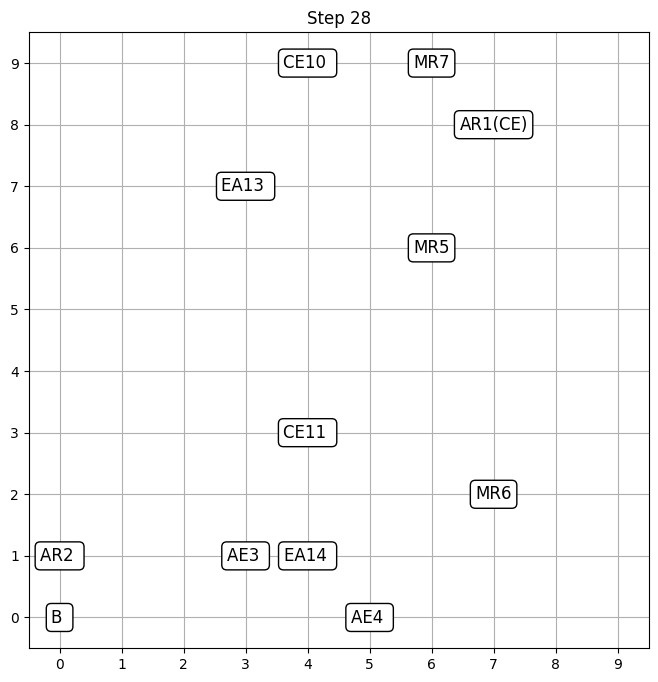

Agent 1 at position (7, 8) is of class ReativoSimples
Agent 2 at position (0, 0) is of class ReativoSimples
Agent 3 at position (1, 4) is of class AgentEstados
Agent 4 at position (1, 4) is of class AgentEstados


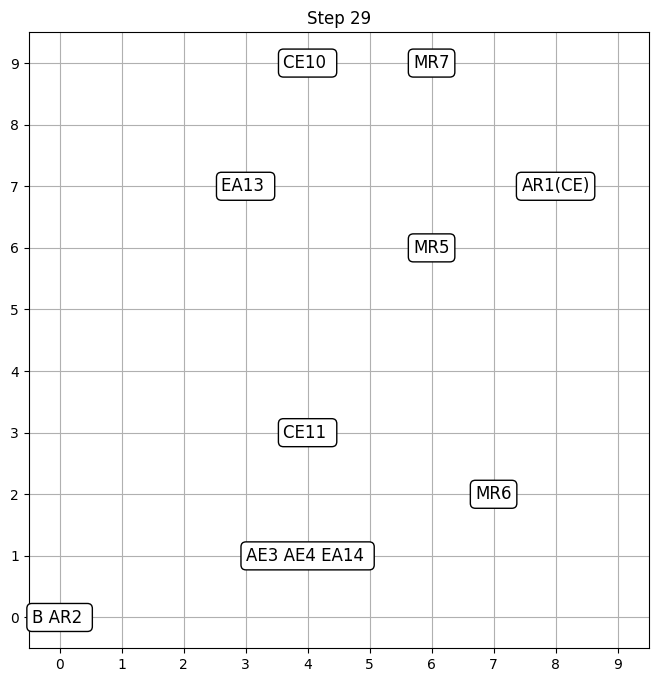

((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))
((0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5))


In [28]:
# Parameters
num_agents = 2
width = 10
height = 10
num_cristais = 5
num_metais = 3
num_estruturas_old = 2
num_steps = 30
base = (0, 0)

# Create the model
model = RandomWalkModel(num_agents, width, height, num_cristais, num_metais, num_estruturas_old, base)

# Run the model and visualize each step with adjustable image size
fig_width = 8  # Adjust figure width
fig_height = 8  # Adjust figure height
for step in range(num_steps):
    visualize_model(model, step, fig_width, fig_height)
    model.step()

In [29]:
print(f"Contribuição total: {model.contribuicao_total}")
for agent in model.schedule.agents:
    #if isinstance(agent,ReativoSimples):
    nome = agent.nome
    print(f"Contribuição do agente {nome}{agent.unique_id}: {agent.contribuicao}")

Contribuição total: 20
Contribuição do agente AR1: 10
Contribuição do agente AR2: 10
Contribuição do agente AE3: 0
Contribuição do agente AE4: 0
